# Tomografía
[Inserte un texto aquí]

#### Grupo 1
* DAVIDOV, Gonzalo Joaquin
* FARALL, Facundo David
* KAMMANN, Lucas Agustín
* TROZZO, Rafael Nicolás

## 1. Función de densidad $f_c(t_1, t_2)$
[Inserte un texto aquí]

In [55]:
from skimage.data import shepp_logan_phantom
from skimage.data import brick

In [56]:
import matplotlib.pyplot as plt

In [57]:
import numpy as np

In [58]:
def get_rectangles_image(outer_size, inner_size):
    """ Generates an image consisting in a white rectangle inside a black rectangle
        @param outer_size Size of the outer rectangle
        @param inner_size Size of the inner rectangle
    """
    img = np.zeros((outer_size, outer_size))
    inner_half = inner_size // 2
    outer_half = outer_size // 2
    img[outer_half - inner_half : outer_half + inner_half,outer_half - inner_half : outer_half + inner_half] = 1.0
    return img

### 1.1. Selección de la función $f_c(t_1, t_2)$

In [71]:
# Choose some of the possible density function for testing purposes
img = shepp_logan_phantom()
# img = get_rectangles_image(8, 4)

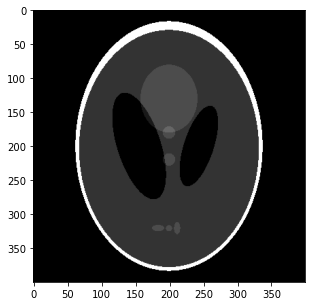

In [72]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.show()

## 2. Proyecciones $p(\theta, t)$
[Inserte un texto aquí]

In [73]:
from skimage.transform import radon, iradon

In [77]:
samples = 10 # How many projections will be taken from the original density 2D function using the Radon transform
from_theta = 0 # Initial value of theta in the sequence of sampling values
to_theta = 180 # Final value of theta in the sequence of sampling values
theta = np.linspace(from_theta, to_theta, samples, endpoint=False) # Generate the angles at which the projections are taken

In [78]:
sinogram = radon(img, theta=theta)

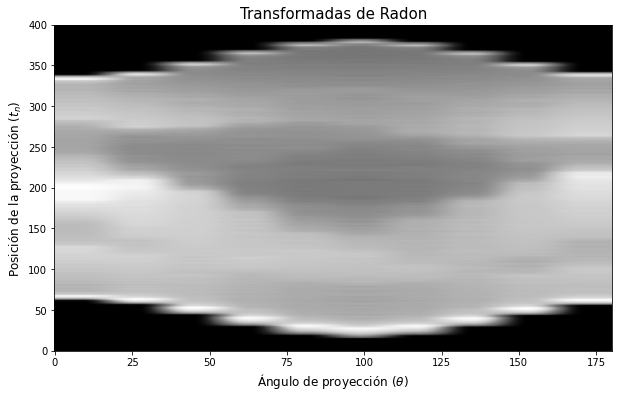

In [79]:
dx, dy = 0.5 * 180.0 / max(img.shape), 0.5 / sinogram.shape[0]
plt.figure(figsize=(10, 6))
plt.title("Transformadas de Radon", fontsize=15)
plt.xlabel("Ángulo de proyección ($\\theta$)", fontsize=12)
plt.ylabel("Posición de la proyección ($t_n$)", fontsize=12)
plt.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
plt.show()

## 3. Reconstrucción
[Inserte un texto aquí]

In [80]:
reconstructed_img = iradon(sinogram, theta=theta)

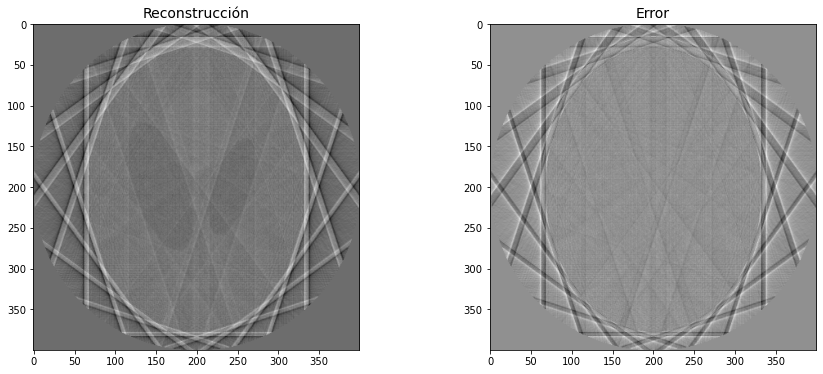

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Reconstrucción', fontsize=14)
axes[0].imshow(reconstructed_img, cmap='gray')
axes[1].set_title('Error', fontsize=14)
axes[1].imshow(img - reconstructed_img, cmap='gray')
plt.show()